In [13]:
#Project 01:
#Load the Dataset
import pandas as pd

url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(url)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [14]:
#Find the missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [15]:
#Fill Missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')

print(df[['Age', 'Cabin']].head(10))

         Age    Cabin
0  22.000000  Unknown
1  38.000000      C85
2  26.000000  Unknown
3  35.000000     C123
4  35.000000  Unknown
5  29.699118  Unknown
6  54.000000      E46
7   2.000000  Unknown
8  27.000000  Unknown
9  14.000000  Unknown


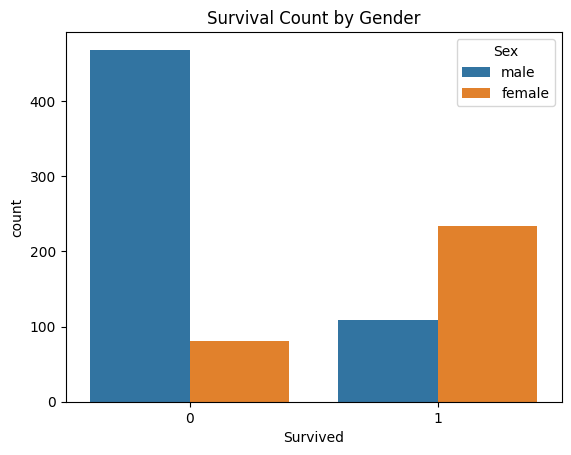

In [16]:
#Plot Survived vs. Dead with Male/Female distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.show()


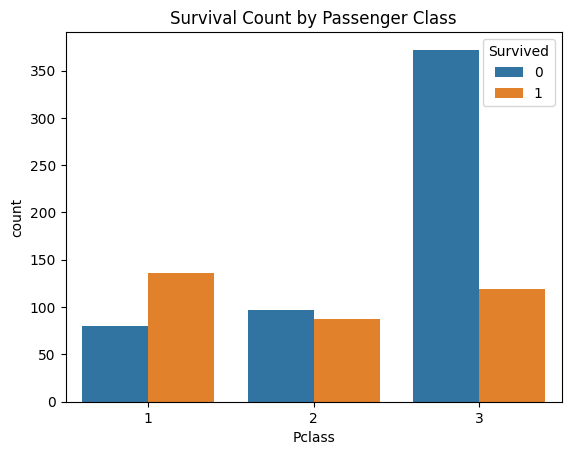

In [17]:
#Plot Survived/Dead against Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


In [18]:
#Create Ageclass
def classify_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

print(df.columns)
df['AgeClass'] = df['Age'].apply(classify_age)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [19]:
#Drop Age Column
df.drop(columns=['Age'], inplace=True)

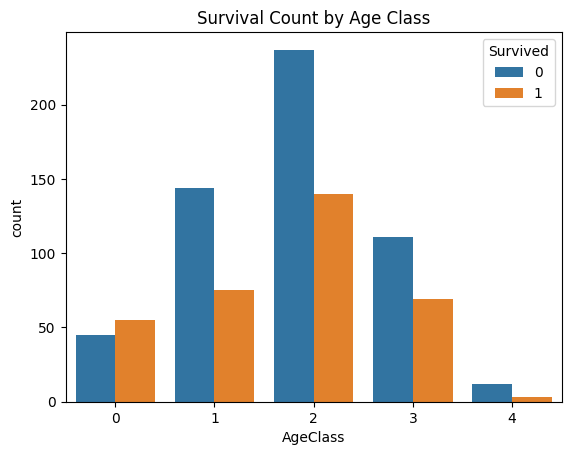

In [20]:
#Plot Survived/Dead against AgeClass
sns.countplot(x='AgeClass', hue='Survived', data=df)
plt.title("Survival Count by Age Class")
plt.show()


   SibSp  Parch  Number of Relatives
0      1      0                   -5
1      1      0                   -5
2      0      0                   -6
3      1      0                   -5
4      0      0                   -6
5      0      0                   -6
6      0      0                   -6
7      3      1                   -2
8      0      2                   -4
9      1      0                   -5


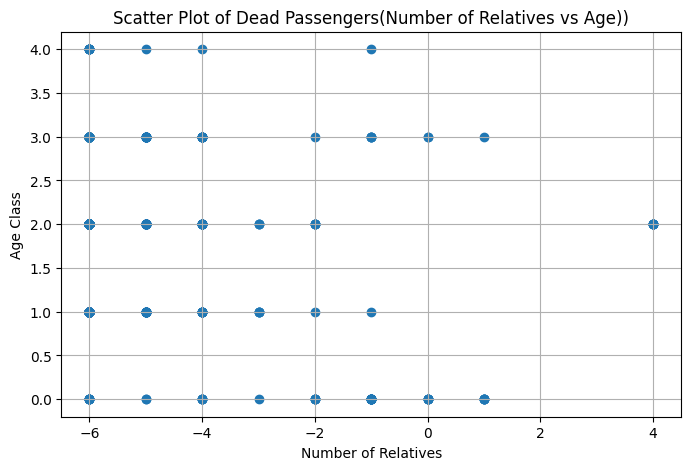

In [23]:
#Assignment 5
df['Number of Relatives'] = df['SibSp'] + df['Parch'] - 6
print(df[['SibSp', 'Parch', 'Number of Relatives']].head(10))

dead_passengers = df[df['Survived'] == 0]

plt.figure(figsize=(8, 5))
plt.scatter(dead_passengers['Number of Relatives'], dead_passengers['AgeClass'])

plt.xlabel("Number of Relatives")
plt.ylabel("Age Class")
plt.title("Scatter Plot of Dead Passengers(Number of Relatives vs Age))")
plt.grid(True)
plt.show()


In [ ]:
#Project 02:
#Create CSV files for term-test results

import numpy as np

students = ['Student ' + str(i) for i in range(1, 51)]
reg_numbers = [1000 + i for i in range(50)]
tt1_marks = np.random.randint(30, 100, 50)
tt2_marks = np.random.randint(30, 100, 50)

df1 = pd.DataFrame({'Registration Number': reg_numbers, 'Name': students, 'TT-1 Marks': tt1_marks})
df2 = pd.DataFrame({'Registration Number': reg_numbers, 'Name': students, 'TT-2 Marks': tt2_marks})

df1.to_csv('term-test-1-result.csv', index=False)
df2.to_csv('term-test-2-result.csv', index=False)


In [ ]:
#Load both files in Pandas
df1 = pd.read_csv('term-test-1-result.csv')
df2 = pd.read_csv('term-test-2-result.csv')


In [ ]:
#Merge both databases
merged_df = pd.merge(df1, df2, on=['Registration Number', 'Name'])
print(merged_df.head())


   Registration Number       Name  TT-1 Marks  TT-2 Marks
0                 1000  Student 1          83          66
1                 1001  Student 2          41          98
2                 1002  Student 3          79          38
3                 1003  Student 4          92          65
4                 1004  Student 5          95          33


In [ ]:
#Create Column
merged_df['Best Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)


In [ ]:
#Drop TT-1 Marks and TT-2 Marks
merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)


In [ ]:
#Save to a new CSV file
merged_df.to_csv('final-term-test-result.csv', index=False)


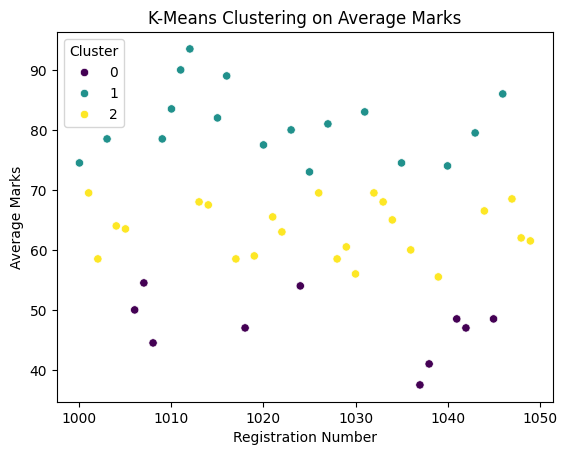

In [ ]:
#K-Means Clustering on Average Marks
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(merged_df[['Average Marks']])

sns.scatterplot(x=merged_df['Registration Number'], y=merged_df['Average Marks'], hue=merged_df['Cluster'], palette='viridis')
plt.title("K-Means Clustering on Average Marks")
plt.show()
